In [66]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(trainX_data, trainy_data), (testX_data, testy_data) = fashion_mnist.load_data()

In [68]:
x_train=trainX_data[0:1000,:,:]
y_train=trainy_data[0:1000]
x_test=testX_data[0:3000,:,:]
y_test=testy_data[0:3000]
x_train=x_train.reshape((1000,784))
x_test=x_test.reshape((3000,784))

In [69]:
def init_weights():
    weights = np.random.normal(loc = 0.0, scale = 0.01, size = ((784,225)))
    return weights

In [70]:
def distance(vec1,vec2):
  res=sum((vec1-vec2)**2)
  return res

In [71]:
def neighborhood_finder(R,x_train,w,min_index,learning_rate):
  for k in range(2*R+1):
    for i in range(2*R+1):
      if (min_index-16+15*k+i)<=224:
        wnew[:,min_index-16+15*k+i]=w[:,min_index-16+15*k+i]+learning_rate*(x_train-w[:,min_index-16+15*k+i])
  return wnew

In [72]:
def SOM(x_train,w,R,iterations,decay_factor,initial_learning_rate):
  vector=np.zeros((10,784,225))
  learning_rate=initial_learning_rate
  for k in range(iterations):
    print(k)
    for i in range(1000):
      
      dis=[]
    
      for j in range(225):
        dis.append(distance(x_train[i],w[:,j]))
      
      min_value = min(dis)
      min_index = dis.index(min_value)
      wnew=neighborhood_finder(R,x_train[i],w,min_index,learning_rate)
      
      w=wnew
    vector[k,:,:]=w
    learning_rate=0.5*decay_factor
  return w,vector

In [73]:
iterations=10
initial_learning_rate=0.6
R=1
decay_factor=0.5
w = np.random.rand(784,225)
wnew=np.zeros((784,225))
final_w,vector=SOM(x_train,w,R,iterations,decay_factor,initial_learning_rate)

0
1
2
3
4
5
6
7
8
9


In [80]:
g=vector[4]

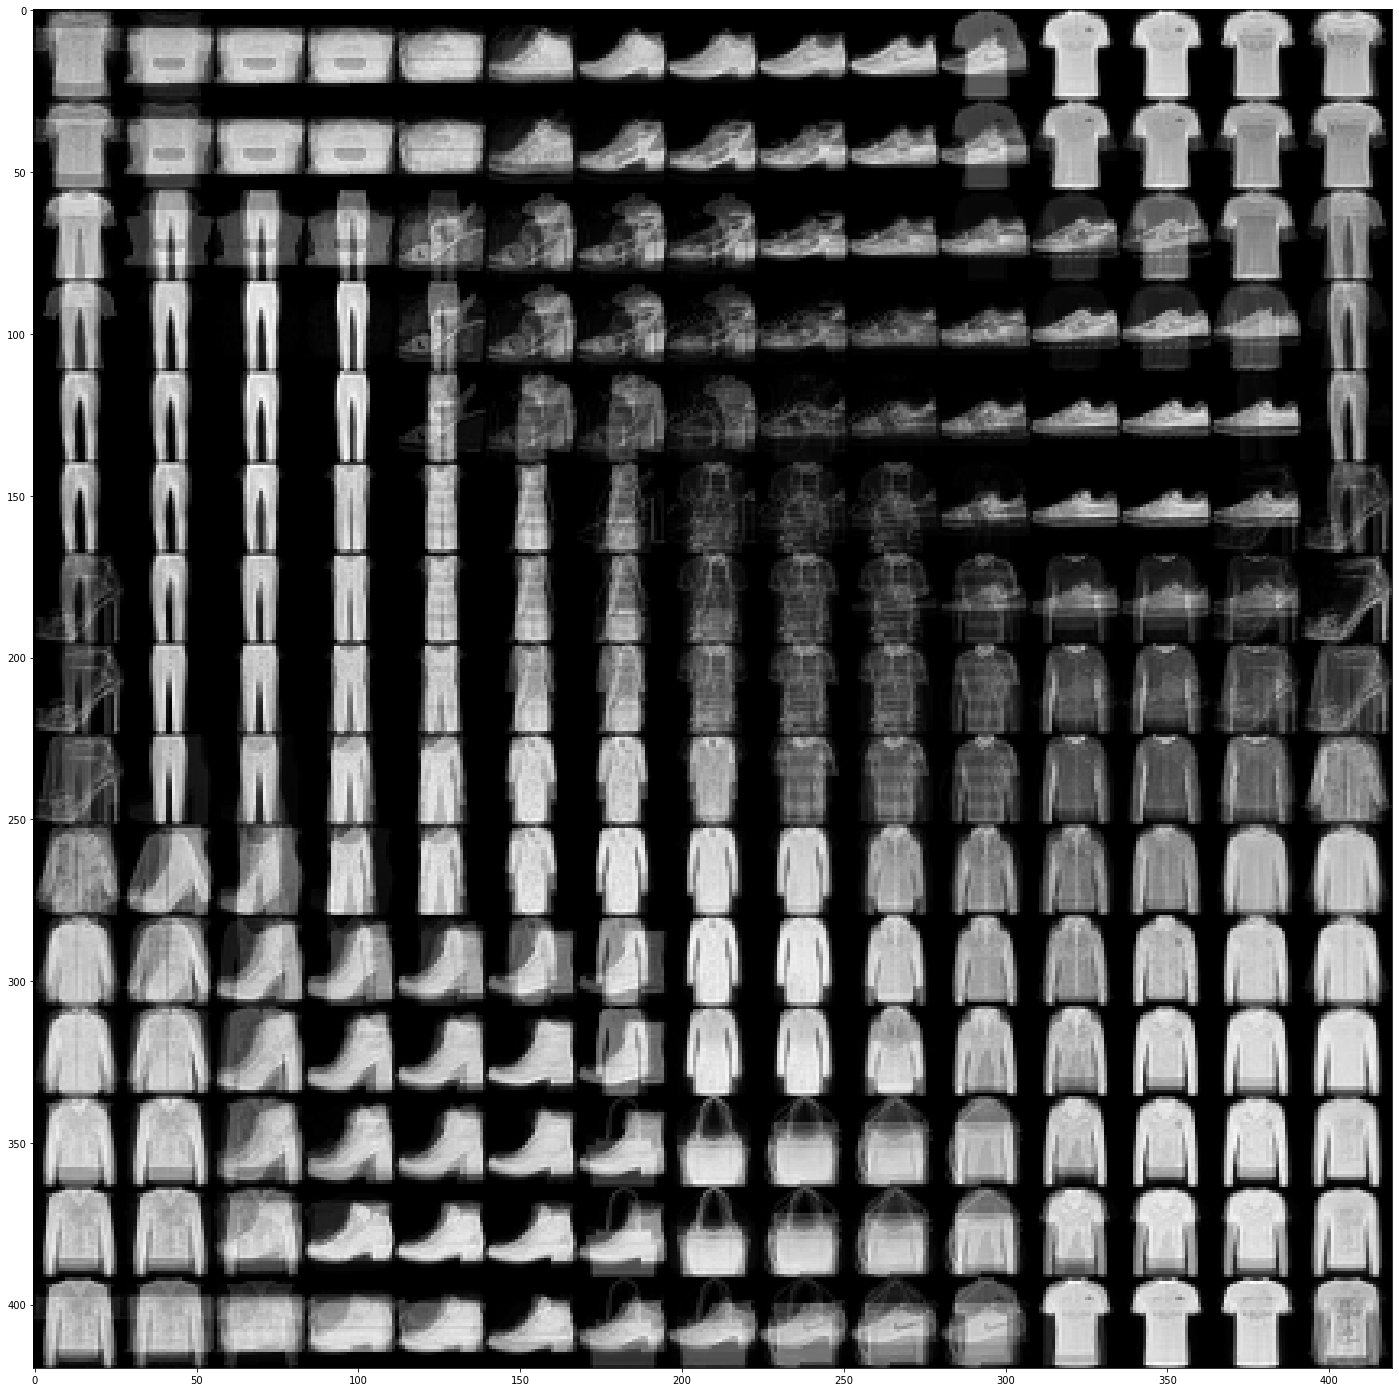

In [81]:
matrix=np.zeros((420,420))
cnt=0
for i in range(225):
  p=g[:,i].reshape((28,28))
  r=i%15
  matrix[cnt*28:28*cnt+28,r*28:28*r+28] = p
  if (i+1)%15 ==0:
    cnt=cnt+1
plt.figure(figsize = (25, 25))
plt.imshow(matrix, cmap = "gray")

In [82]:
data_map=np.zeros(225)
class_map=np.zeros((225,10))
for i in range(3000):
  dis=[]
  for j in range(225):
    dis.append(distance(x_test[i],final_w[:,j]))
  min_value = min(dis)
  min_index = dis.index(min_value)
  data_map[min_index] = data_map[min_index]+1
  class_map[min_index,y_test[i]]=1

Text(0.5, 1.0, 'histogram of data assigned number during nueron clusters')

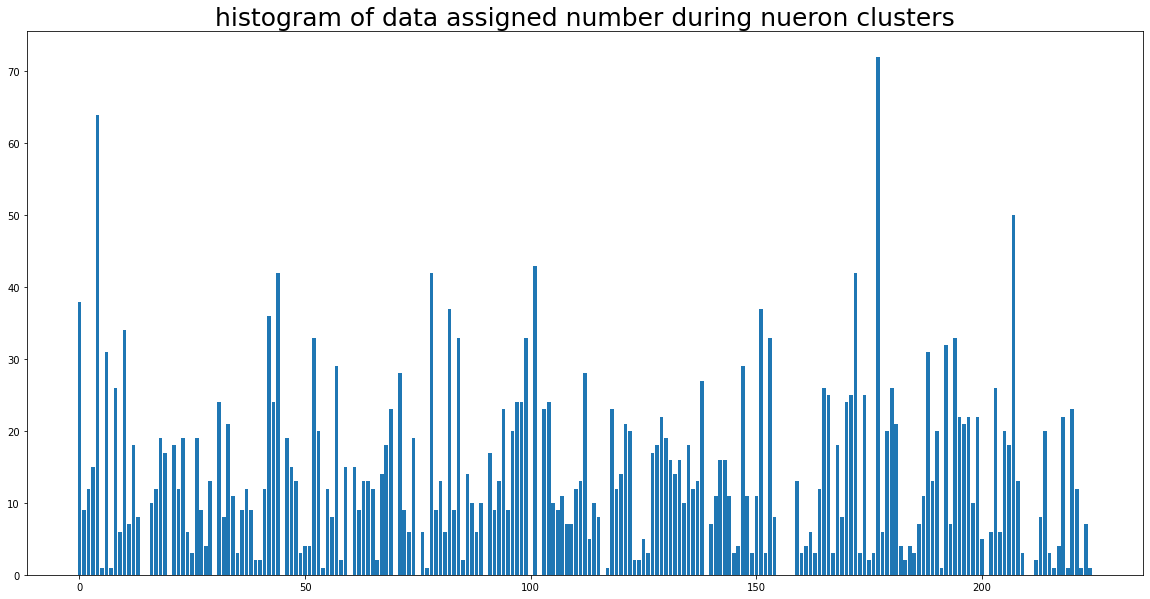

In [100]:
index=list(range(225))
plt.figure(figsize = (20, 10))
plt.bar(index,data_map)
plt.title("histogram of data assigned number during nueron clusters", fontsize = 25)

Text(0.5, 1.0, 'histogram of class assigned number during nueron clusters')

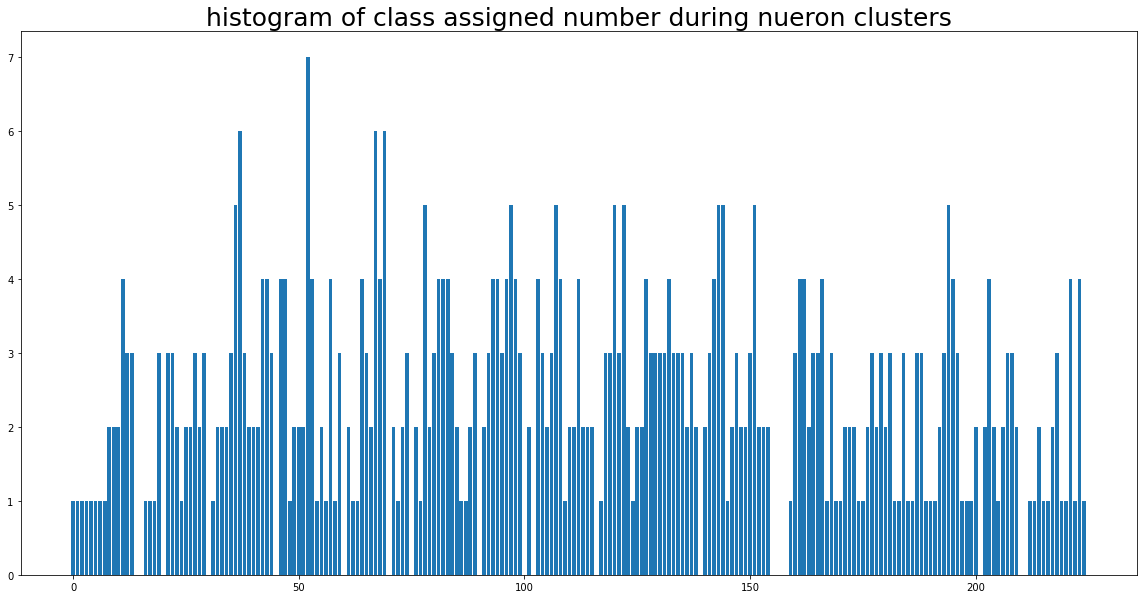

In [101]:
index=list(range(225))
plt.figure(figsize = (20, 10))
plt.bar(index,np.sum(class_map,1))
plt.title("histogram of class assigned number during nueron clusters", fontsize = 25)

In [102]:
def SOM1(x_train,w,R,iterations,decay_factor,initial_learning_rate):
  vector=np.zeros((10,784,225))
  learning_rate=initial_learning_rate
  for k in range(iterations):
    print(k)
    for i in range(1000):
      
      dis=[]
    
      for j in range(225):
        dis.append(distance(x_train[i],w[:,j]))
      
      min_value = min(dis)
      min_index = dis.index(min_value)
      wnew=neighborhood_finder(R,x_train[i],w,min_index,learning_rate)
      
      w=wnew
    vector[k,:,:]=w
    learning_rate=0.5*decay_factor
    if R>0 :
      R=R-1

  return w,vector

In [103]:
iterations=10
initial_learning_rate=0.6
R=3
decay_factor=0.5
w = np.random.rand(784,225)
wnew=np.zeros((784,225))
final_w,vector=SOM1(x_train,w,R,iterations,decay_factor,initial_learning_rate)

0
1
2
3
4
5
6
7
8
9


In [114]:
g=vector[4]

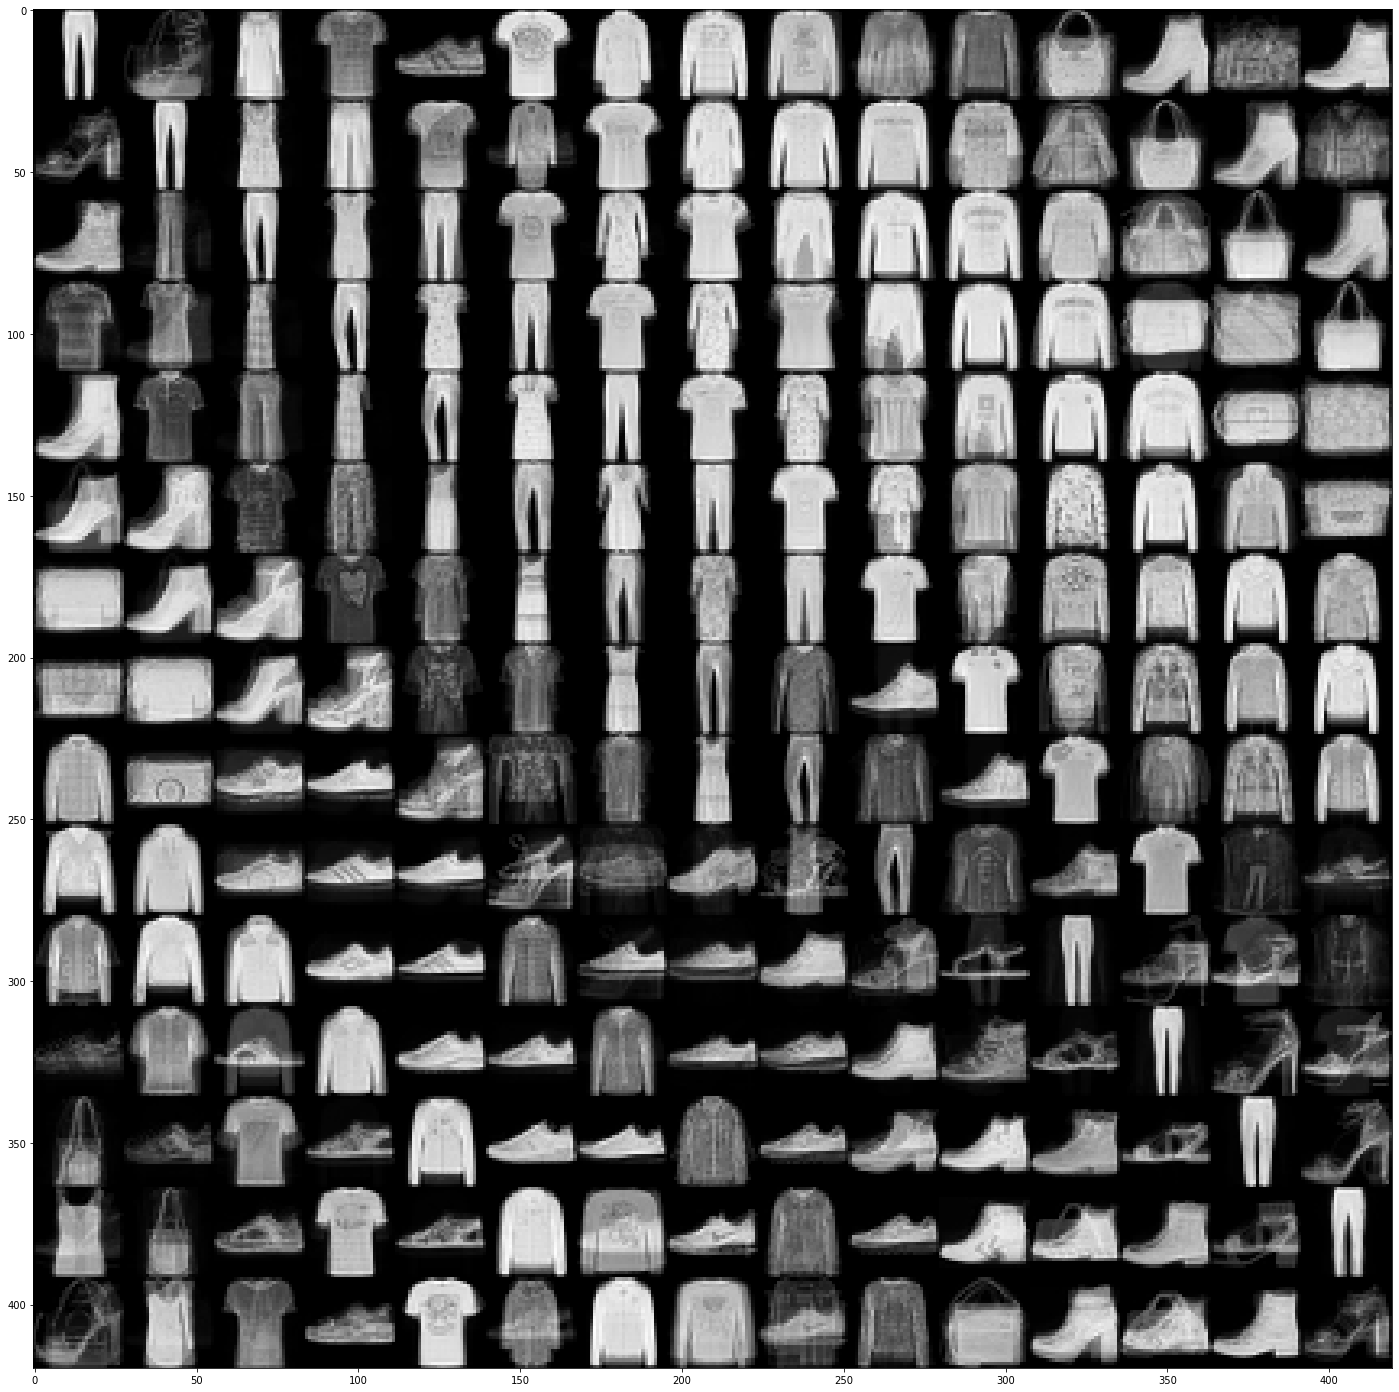

In [115]:
matrix=np.zeros((420,420))
cnt=0
for i in range(225):
  p=final_w[:,i].reshape((28,28))
  r=i%15
  matrix[cnt*28:28*cnt+28,r*28:28*r+28] = p
  if (i+1)%15 ==0:
    cnt=cnt+1
plt.figure(figsize = (25, 25))
plt.imshow(matrix, cmap = "gray")

In [106]:
data_map=np.zeros(225)
class_map=np.zeros((225,10))
for i in range(3000):
  dis=[]
  for j in range(225):
    dis.append(distance(x_test[i],final_w[:,j]))
  min_value = min(dis)
  min_index = dis.index(min_value)
  data_map[min_index] = data_map[min_index]+1
  class_map[min_index,y_test[i]]=1

Text(0.5, 1.0, 'histogram of data assigned number during nueron clusters')

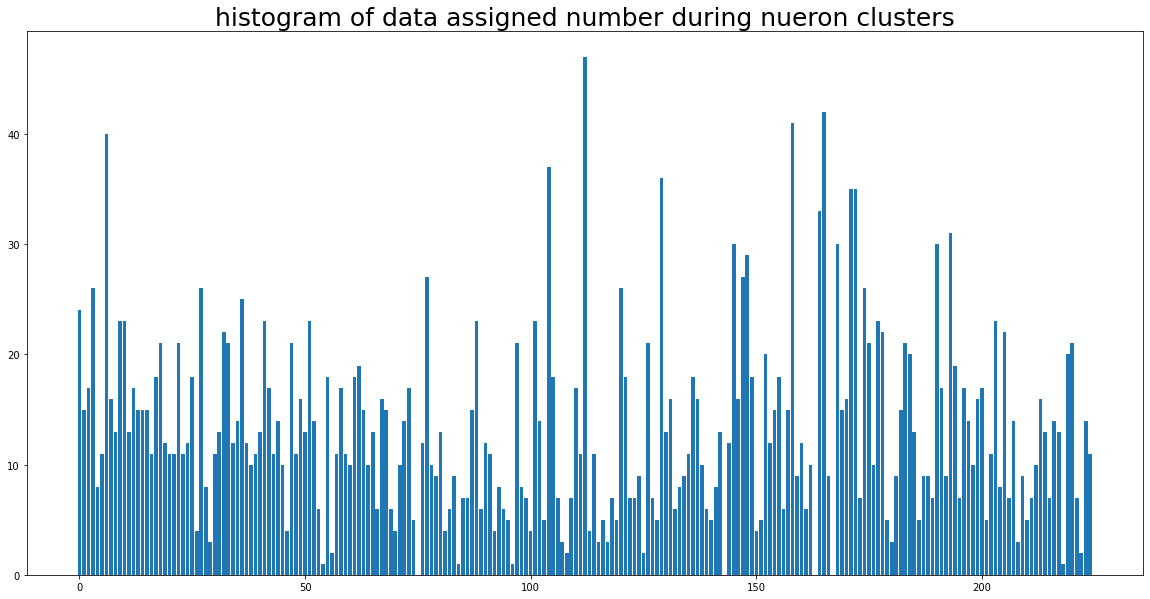

In [107]:
index=list(range(225))
plt.figure(figsize = (20, 10))
plt.bar(index,data_map)
plt.title("histogram of data assigned number during nueron clusters", fontsize = 25)

Text(0.5, 1.0, 'histogram of class assigned number during nueron clusters')

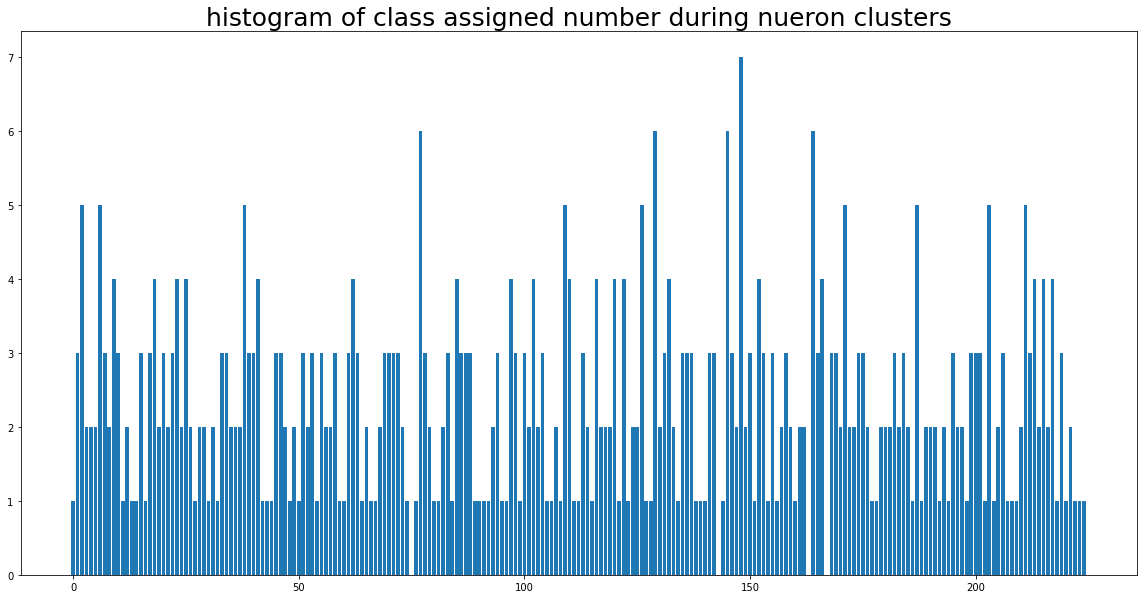

In [108]:
index=list(range(225))
plt.figure(figsize = (20, 10))
plt.bar(index,np.sum(class_map,1))
plt.title("histogram of class assigned number during nueron clusters", fontsize = 25)

In [116]:
iterations=10
initial_learning_rate=0.6
R=0
decay_factor=0.5
w = np.random.rand(784,225)
wnew=np.zeros((784,225))
final_w,vector=SOM(x_train,w,R,iterations,decay_factor,initial_learning_rate)

0
1
2
3
4
5
6
7
8
9


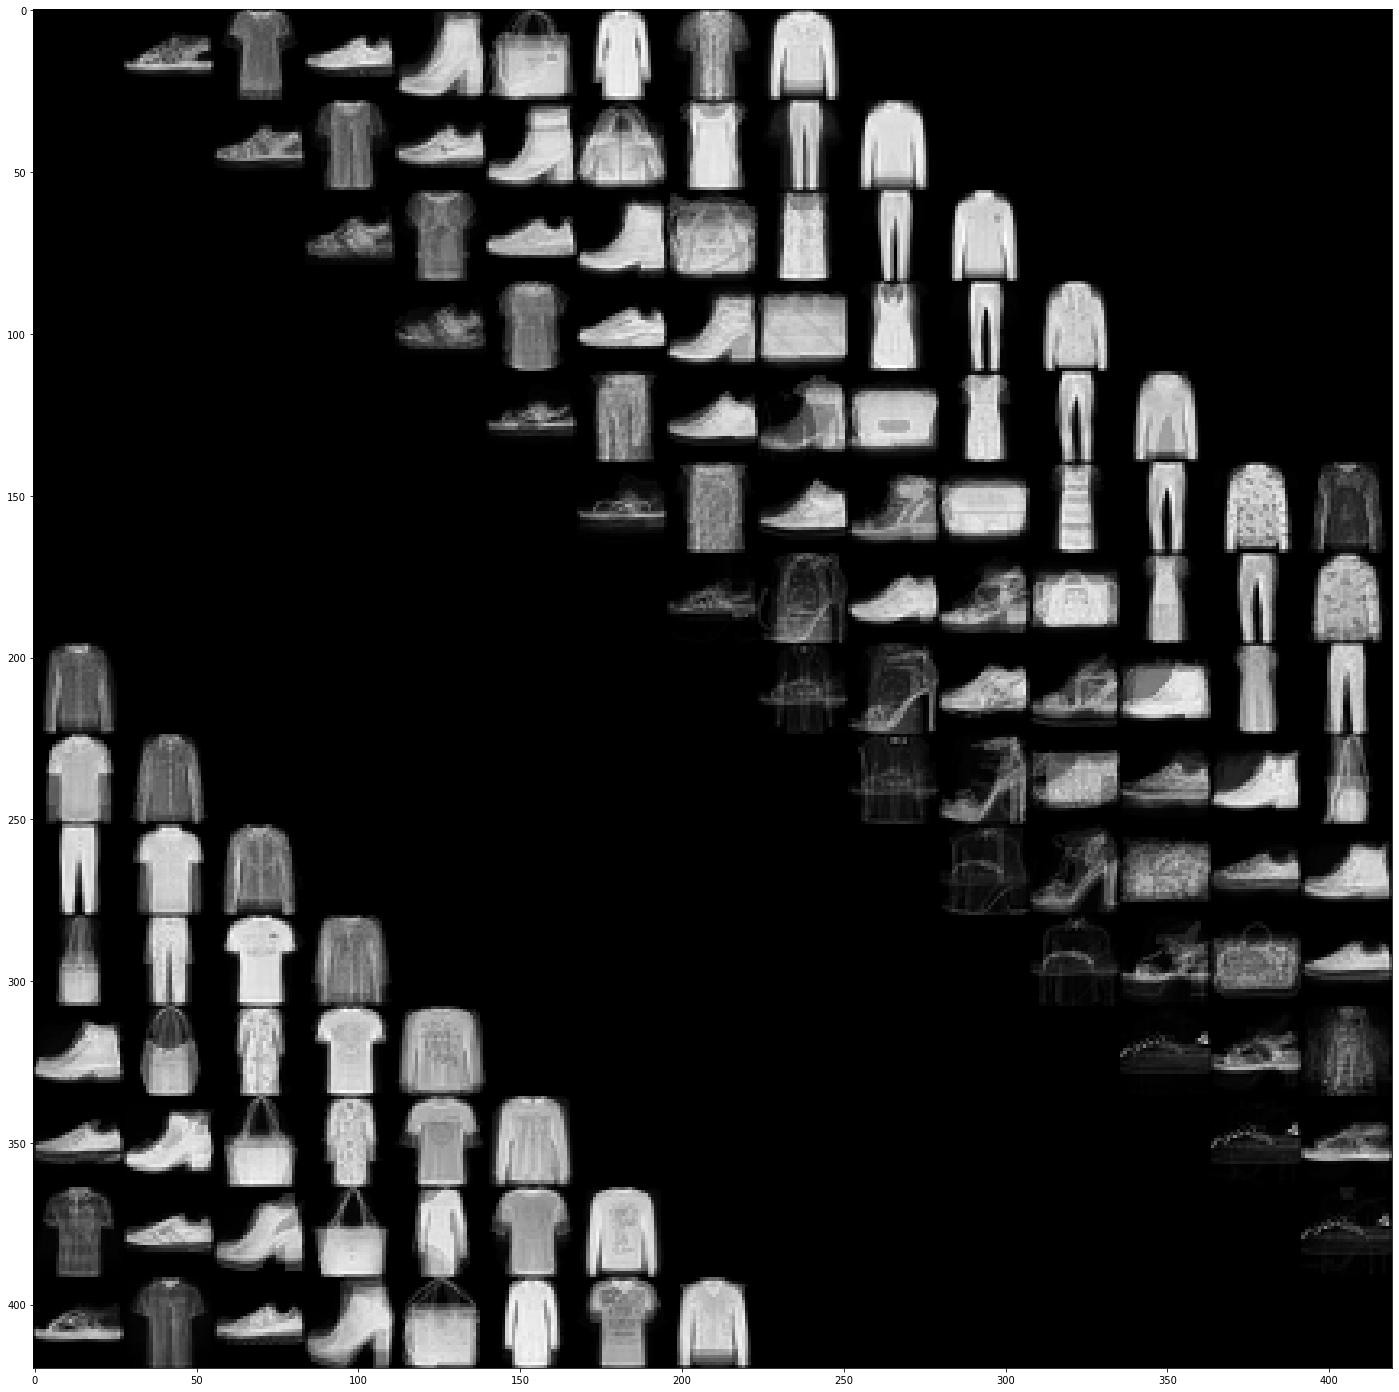

In [117]:
matrix=np.zeros((420,420))
cnt=0
for i in range(225):
  p=final_w[:,i].reshape((28,28))
  r=i%15
  matrix[cnt*28:28*cnt+28,r*28:28*r+28] = p
  if (i+1)%15 ==0:
    cnt=cnt+1
plt.figure(figsize = (25, 25))
plt.imshow(matrix, cmap = "gray")